### NAME : Janhavi Sachin Phulavare


### Project : Hate Speech Detection

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_csv('train.csv')

In [3]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


#### Checking for null values in data :

In [4]:
dataset.isnull()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
24778,False,False,False,False,False,False
24779,False,False,False,False,False,False
24780,False,False,False,False,False,False
24781,False,False,False,False,False,False


In [5]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


#### Mapping the classes into labels column 

In [8]:
 dataset['labels'] = dataset['class'].map({0:'Hate Speech',
                                           1:'Offensive Language',
                                           2:'No Hate or Offensive Language'})

In [9]:
dataset.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [10]:
data = dataset[["tweet","labels"]]

In [11]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


#### Installing Natural Language Prosessing Tool Kit

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import re
import nltk 
import string

#### Importing Stop Word

In [14]:
#Import stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Importing Stemming

In [15]:
#Import stemming
stemmer = nltk.SnowballStemmer("english")

#### Cleaning the tweet column data

In [16]:
import re
import string

def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove stopwords and perform stemming with spaces
    cleaned_text = ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stopwords])
    
    return cleaned_text.strip()



In [17]:
data['tweet'] = data['tweet'].apply(clean_data)


C:\Users\janha\AppData\Local\Temp\ipykernel_15888\1753638001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [18]:
data


,tweet,labels
0,rt mayasolov woman complain clean hous amp...,No Hate or Offensive Language
1,rt boy dat cold tyga dwn bad cuffin dat h...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bit...,Offensive Language
3,rt c g anderson viva base look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might ...,Offensive Language
...,...,...
24778,muthaf lie lifeask pearl corey emanu...,Offensive Language
24779,gone broke wrong heart babi drove redneck crazi,No Hate or Offensive Language
24780,young buck wanna eat dat nigguh like aint ...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


#### Spliting data into input and target columns

In [19]:
X=np.array(data['tweet'])
y=np.array(data['labels'])

In [20]:
X

array(['rt  mayasolov  woman complain clean hous   amp  man alway take trash',
       'rt    boy dat cold   tyga dwn bad cuffin dat hoe  place',
       'rt  urkindofbrand dawg     rt    ever fuck bitch start cri  confus shit',
       ..., 'young buck wanna eat     dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl   ntac eileen dahlia   beauti color combin pink  orang  yellow  amp  white  coll'],
      dtype=object)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#### Performing Count Vectorization

In [22]:
cv=CountVectorizer()
x=cv.fit_transform(X)

In [23]:
x

<24783x24921 sparse matrix of type '<class 'numpy.int64'>'
	with 198443 stored elements in Compressed Sparse Row format>

#### Spilting data into training and testing data

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42)

#### Decision Tree Model 

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=dt.predict(X_test)

#### Confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 168,   48,  249],
       [  22, 1225,  132],
       [ 276,  188, 5871]], dtype=int64)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

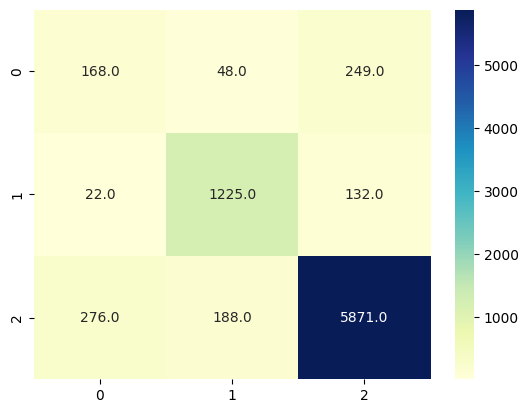

In [30]:
sns.heatmap(cm,annot=True,fmt='.1f', cmap='YlGnBu')

#### Checking for accuracy of model 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.888128133023597

#### 88% accuarcy

#### Testing with sample data

In [84]:
sample="LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers "
sample=clean_data(sample)

In [85]:
sample

'lmfaoooo hate black peopl  black peopl nigger'

In [86]:
data1=cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)